# Predicting NBA Game Outcomes Based on a Single Team's Game Stats
##### by Bryan Mildort

This notebook serves as my introduction to Machine Learning and Data Science. It can also serve as a reference for future learners. Common machine learning libraries (Pandas, Numpy, Scikit-Learn) are used throughout the project. A project like this is perfectly suitable for beginners because there is massive data on NBA games readily available.


## The Game Plan  

Lets say we want to create a model that when given particular stats for a game, it can predict whether that team won or lost by only using the stats of the game for that team. Would it be more accurate to use all that stats available or just specific ones?

###### What we will intend to do is:
1. Scrape the Data: 
NBA.com has data of all games dating back to 1983. Scraping the data with Selenium or BeautifulSoup is an option, but would be a great pain and would take a large amount of time (a data scientist's biggest dilemma). Luckliy, there is an [NBA.com API Client](https://github.com/swar/nba_api) made available by some wonderful Github contributors.

2. Clean and Analyze the Data:
This will be a relatively large data set that will probably contain null values and raw output that needs parsing. There are several ways at which you may go about this (Excel, Python Libraries, etc).

3. Create and Test the Model:
The type of model you choose will vary and depends on the features of your data and of the output you're trying to predict.


### Scraping the Data
After installing the nba_api module and some browsing of the [Documentation](https://github.com/swar/nba_api/blob/master/docs/table_of_contents.md), you can see that the module has 'teams' and 'leaguegamefinder' functions that will help us gather historical game data:

In [1]:
import pandas as pd

from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

nba_teams = teams.get_teams() # Dictionary of NBA Teams and various attributes
team_ids = []

for i in nba_teams:
    team_ids.append(i['id']) # Appending team IDs to list
    
#for i in team_ids:
    #gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=i) # Retrieve Historical Game Data
    #games = gamefinder.get_data_frames()[0]
    #games.to_csv('games.csv', mode='a')

You should now have a csv file of all games played with their stats dating all the way back to 1983 (you may have to split the retrieval commands because NBA.com times you out after so many requests):

In [2]:
df = pd.read_csv('games.csv')
print(df)

       SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME   GAME_ID  \
0          42021  1610612737               ATL      Atlanta Hawks  42100105   
1          42021  1610612737               ATL      Atlanta Hawks  42100104   
2          42021  1610612737               ATL      Atlanta Hawks  42100103   
3          42021  1610612737               ATL      Atlanta Hawks  42100102   
4          42021  1610612737               ATL      Atlanta Hawks  42100101   
...          ...         ...               ...                ...       ...   
99850      21988  1610612766               CHH  Charlotte Hornets  28800062   
99851      21988  1610612766               CHH  Charlotte Hornets  28800052   
99852      21988  1610612766               CHH  Charlotte Hornets  28800024   
99853      21988  1610612766               CHH  Charlotte Hornets  28800015   
99854      21988  1610612766               CHH  Charlotte Hornets  28800008   

        GAME_DATE      MATCHUP WL  MIN  PTS  ...  F

### Cleaning and Analyzing the Data
To make the model feasible, I decided to only include data starting from the last 10 years (beginning in 2012). I also normalized the data on a scale of 0-1 as a personal preference. To do this, I used [Excel VBA Scripts](https://docs.microsoft.com/en-us/office/vba/library-reference/concepts/getting-started-with-vba-in-office), as well as the libraries available in Anaconda. You can manually do this in however manner you please.

You will also want to split your training and test data. There are several methods in which you can do it. I did an 80-20% split using Excel VBA, the output is two csv files: 'nba_train.csv' and 'nba_test.csv'.

#### FINALLY, Now here comes the fun parts - Machine Learning at its finest:

To initiate the Exploratory Data Analysis (EDA), I used [Speedml](https://pythonhosted.org/speedml/) to create some figures in order to visualize which features are most important. Let's initialize it:

In [ ]:
from speedml import Speedml
sml = Speedml('nba_train.csv', 'nba_test.csv',target='Outcome')

This will create our instance which we will use for further analysis. It is important to note that at this stage, you have your data split as Pandas dataframes, and they can be called using 'sml.train' and 'sml.test':

In [4]:
sml.train.head() # Preview first 5 lines of training dating

,Unnamed: 0,P0S,FGM,FGA,FG_PC0,FG3M,FG3A,FG3_PC0,F0M,F0A,F0_PC0,0REB,DREB,REB,AS0,S0L,BLK,00V
0,0,0.505376,0.418919,0.544118,0.503001,0.275862,0.357143,0.1600,0.393443,0.3500,0.857,0.272727,0.535714,0.518519,0.288462,0.296296,0.086957,0.475
1,1,0.462366,0.405405,0.551471,0.480192,0.517241,0.600000,0.1785,0.180328,0.2500,0.550,0.250000,0.535714,0.506173,0.346154,0.074074,0.130435,0.375
2,2,0.596774,0.554054,0.588235,0.615846,0.413793,0.457143,0.1875,0.278689,0.2625,0.810,0.113636,0.553571,0.444444,0.442308,0.185185,0.130435,0.275
3,3,0.564516,0.554054,0.639706,0.565426,0.413793,0.571429,0.1500,0.180328,0.1750,0.786,0.159091,0.589286,0.493827,0.403846,0.222222,0.086957,0.475
4,4,0.489247,0.391892,0.551471,0.464586,0.344828,0.514286,0.1390,0.377049,0.3375,0.852,0.181818,0.535714,0.469136,0.307692,0.296296,0.086957,0.450


Now let's create a heatmap that displays feature correlation (it should by default appear in tkinter):

In [ ]:
sml.plot.correlate()

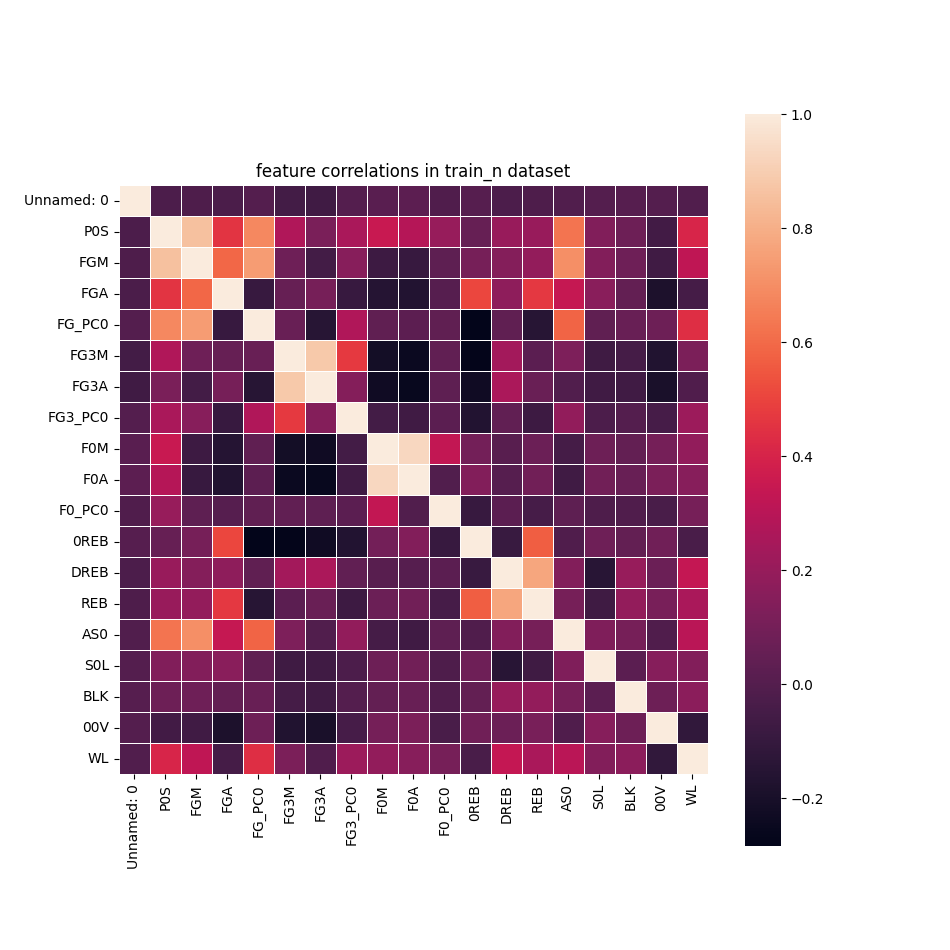

Specifically looking at Win/Loss (WL), we can see that a win correlates the most with Total Points, FG%, Defensive Rebounds, and Assists. These are the variables that you would ideally want to create your model with if you decided to remove features.

Now lets create a graphic that displays feature importance, meaning which features are most influential when differentiating your classes, provided that the model performs well:

In [ ]:
sml.plot.importance()

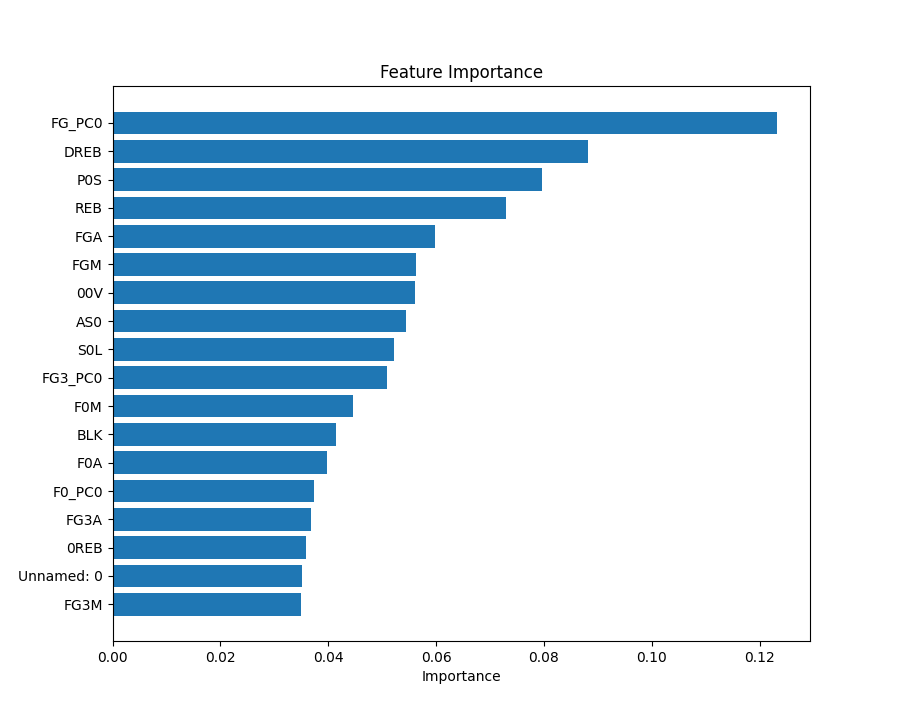

We can also create plots like continuous, ordinal, etc. Here is how to generate a Distribution plot of all the attributes:

In [ ]:
sml.plot.distribute()

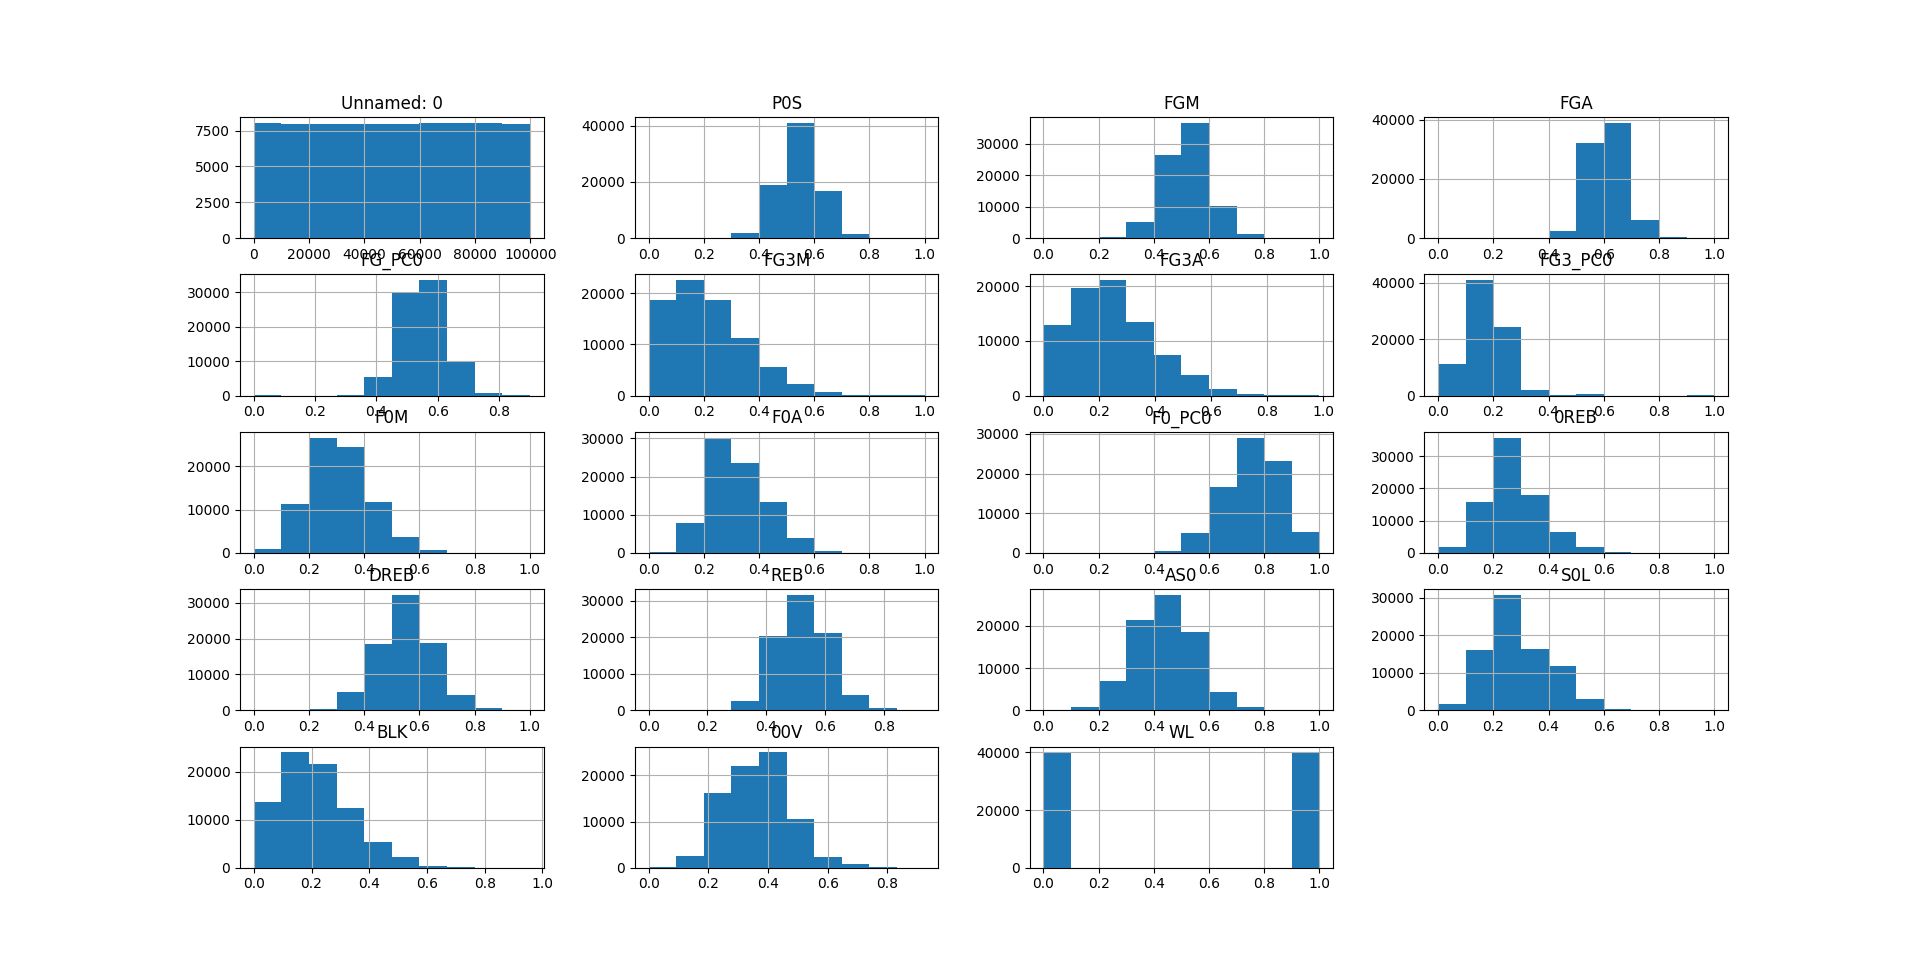

Lets now impute the data, which removes all null data values and replaces them with 0. This is another really useful function as most models require no NaN values:

In [ ]:
sml.feature.impute() # Data imputation

### Create and Test the Model
Remember that you must run the data through your models as Numpy arrays and not Pandas dataframes. You can attempt to do this using the Pandas concat() function, but using to_csv() and doing it via Excel was simpler for me. I named the output file 'nbascaled.csv'.

Now lets use sklearn's test_train_split function to help out with this. Although this method requires that you recombine your previous dataframes 'sml.train' and 'sml.test' (after imputation), I feel that it is the simplest to grasp initially:

In [9]:
result = pd.read_csv('nbascaled.csv')


X = result.drop(['WL'], axis=1).values
y = result['WL'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Can change test size as you see fit

print(X_train) # Input of training data as Numpy array

[[0.46236559 0.45945946 0.56617647 ... 0.2962963  0.2173913  0.475     ]
 [0.51612903 0.45945946 0.52941176 ... 0.33333333 0.30434783 0.45      ]
 [0.46236559 0.44594595 0.58823529 ... 0.40740741 0.2173913  0.325     ]
 ...
 [0.47849462 0.44594595 0.54411765 ... 0.33333333 0.17391304 0.5       ]
 [0.53763441 0.51351351 0.57352941 ... 0.2962963  0.2173913  0.275     ]
 [0.53225806 0.5        0.66176471 ... 0.33333333 0.2173913  0.35      ]]


#### Its time to run the models!
Given the ease of implementation for a range of algorithms and my knowledge with Python, I chose to utilize Scikit-learn. I picked a couple models to try out using this [Scikit-learn flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) and compared their performances amongst the data set:

In [ ]:
# LinearSVC classification (69.81%, max_iter=1000)
from sklearn.svm import LinearSVC
lclf = LinearSVC(random_state=0, tol=1e-5, max_iter=1000)
lclf.fit(X_train, y_train)
lclf.score(X_test,y_test)

# KNN model (82.41%, k=10)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

# SVC prediction (81.19%, gamma='scale')
from sklearn.svm import SVC
from sklearn import svm
clf = SVC(gamma='scale',probability=True)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

# BaggingSVC Ensemble classification (74.80%)
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
advclf = BaggingClassifier(base_estimator=SVC(gamma='scale'), n_estimators=10, random_state=0)
advclf.fit(X_train, y_train)
advclf.score(X_test,y_test)

# Random Forest Classification (65.24%)
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=8, random_state=0, n_estimators=300)
rdf.fit(X_train, y_train)
rdf.score(X_test,y_test)

# XGBoost Classification (73.62%)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgbModel = XGBClassifier()
xgbModel.fit(X_train, y_train)
xgbPredictions = xgbModel.predict(X_test)
xgbAccuracy = accuracy_score(y_test, xgbPredictions)

#### The KNN Model provided the highest accuracy out of all the models, being 82.41% accurate at predicting the outcome of NBA games based on a single team's game stats!

However, the feasilibility of using this model in the real world is very miniscule because you would have to predict the game stats of an NBA team at any given night. Nontheless, if you wanted to save the model for use later, you can do so easily with [Pickle](https://docs.python.org/3/library/pickle.html):

In [ ]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb')) # Save the model to disk
 
# Some time later...
 
knn = pickle.load(open(filename, 'rb')) # load the model from disk
result = knn.score(X_test, y_test)
print(result)

Removing features at this stage would be most ideal, but it will undoubtedly sacrifice accuracy. Most machine learning models that exist for NBA predictions also implement complex features such as [ELO Score](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/). The best NBA game prediction models only accurately predict the winner about 70% of the time.

### This concludes the Jupyter Notebook. I hope this resource can be used most effectively!